In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [184]:
data = np.random.randn(7,4)
dot = np.dot
print(data)

[[ 1.30195183 -1.64179989  0.42869554  0.38473793]
 [ 0.83368946 -0.08253713 -1.75339057  0.78352614]
 [-0.72606618 -1.63827634 -2.41670305  1.00025269]
 [-0.84098151 -1.27603943  0.3821065   2.51444343]
 [-0.21422122 -2.04757278 -0.77718045  0.16508063]
 [ 1.23476798 -0.17925436 -0.16493066  1.22191545]
 [-1.23414481 -2.17217859 -1.4698152   1.62273247]]


In [185]:
print(data<0)

[[False  True False False]
 [False  True  True False]
 [ True  True  True False]
 [ True  True False False]
 [ True  True  True False]
 [False  True  True False]
 [ True  True  True False]]


In [186]:
data[data<0] = 0
print(data)

[[ 1.30195183  0.          0.42869554  0.38473793]
 [ 0.83368946  0.          0.          0.78352614]
 [ 0.          0.          0.          1.00025269]
 [ 0.          0.          0.3821065   2.51444343]
 [ 0.          0.          0.          0.16508063]
 [ 1.23476798  0.          0.          1.22191545]
 [ 0.          0.          0.          1.62273247]]


### 아래는 행렬곱과 행렬의 transpose를 구현한 것이다. 
1. 행렬곱은 np.dot에서 가져온 것임.
```python
np.dot(A,B)
```
2. 앞의 행렬의 열과 뒤의 행렬의 행이 맞아야지만 곱이 성사되고, 안 되면 에러를 던짐.

In [187]:
data = np.array([[1,2,3], [4,5,6]])
data1 = np.array([[1,2],[3,4],[5,6]])
result = dot(data, data1)
print(result)
print(result.T)

[[22 28]
 [49 64]]
[[22 49]
 [28 64]]


### matlab 형식의 : 키워드도 사용가능하다.
1. 단 인덱스는 파이썬 인덱스이므로 0부터 시작한다,
2. 뒤의 2는 해당 index를 포함 안하고 이전까지만.
    * 아래는 2행 이전까지, 그리고 2열포함 이후부터를 의미함

In [188]:
a = np.array([[1,2,3,4,5], [4,5,6,7,8], [14,15,16,17,18]])
print(a)
a[:2,2:];
a[:2,2:] = -88
print(a)


[[ 1  2  3  4  5]
 [ 4  5  6  7  8]
 [14 15 16 17 18]]
[[  1   2 -88 -88 -88]
 [  4   5 -88 -88 -88]
 [ 14  15  16  17  18]]


### 타이타닉 데이터를 불러옴

In [189]:
t_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

### 쓸데없는 데이터를 제함.

In [190]:
t_df.drop(['PassengerId','Ticket'], axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


In [191]:
t_df['Embarked'] = t_df['Embarked'].fillna("S")

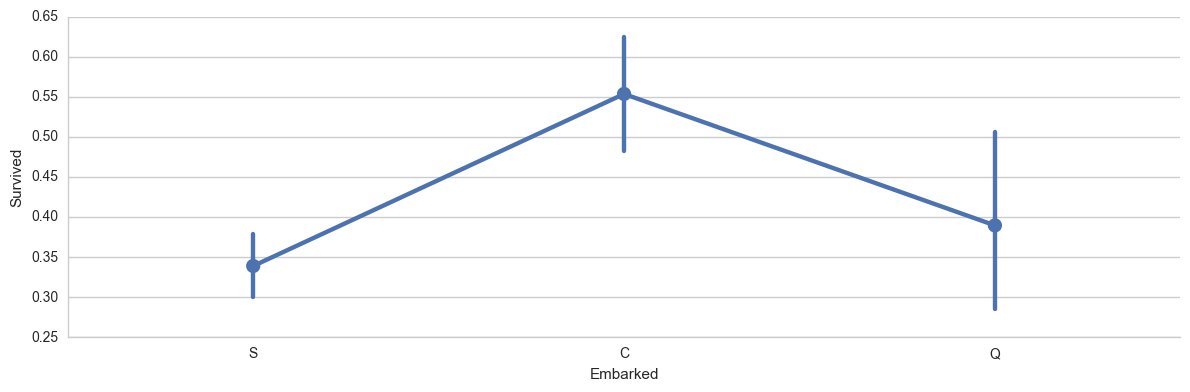

In [192]:
sns.factorplot('Embarked', 'Survived', data=t_df, size=4, aspect=3)

### matplotlib.pyplot 설명
1. subplots
    * subplots는 여러개의 그래프를 한 figure(창) 안에 그릴 수 있게 해 준다.
    * 각 그래프를 axis라고 보면 된다.
    * countplot은 집계해주는 그래프이고, hue를 넣으면 한 가지 변수를 더 넣어서 집계해준다.
    

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


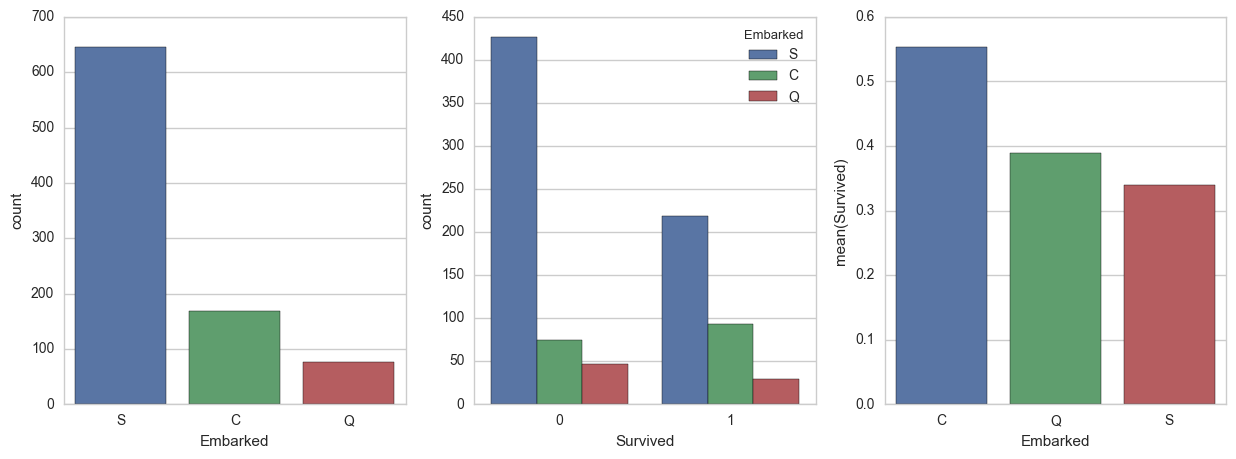

In [193]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=t_df, ax=axis1)
sns.countplot(x='Survived', hue='Embarked', data=t_df, ax=axis2)
#embarked에 대해 집계한다음 평균내서 그래프로 그리기.
#pandas 의 dataFrame Object는 Key값을 가지고 있어서 plot하면 그 키값이 칼럼으로 나온다.
embark_perc = t_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()
print(embark_perc)
sns.barplot(x='Embarked', y='Survived', data=embark_perc, ax=axis3)


### get dummies는 추가적으로 dummy variable을 갖는것이다. 이산적인 변수에 대해서 좋음.

In [194]:
embark_dummies_titanic = pd.get_dummies(t_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

t_df = t_df.join(embark_dummies_titanic)
test_df  = test_df.join(embark_dummies_test)
t_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

In [213]:
#Fare
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)
t_df["Fare"] = t_df["Fare"].astype(int)
test_df["Fare"] = test_df["Fare"].astype(int)

#### print(t_df.shape)
print(t_df['Fare'].dtype)
print(t_df.inv())